# Исследование данных о российском кинопрокате

### Описание исследования.

Заказчик исследования — Министерство культуры Российской Федерации.
Изучим рынок российского кинопроката, уделим внимание фильмам, которые получили государственную поддержку.

### Цель исследования.

Нам нужно изучить рынок российского кинопроката и выявить текущие тренды. Уделим внимание фильмам, которые получили государственную поддержку. Попробуем ответить на вопрос, насколько такие фильмы интересны зрителю. 

### Задачи, выполняемые в рамках исследовательского анализа данных.

   * Посмотрим, сколько фильмов выходило в прокат каждый год. Обратим внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитаем, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.
   
   
   * Изучим, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?
   
   
   * С помощью сводной таблицы посчитаем среднюю и медианную сумму сборов для каждого года.
   
   
   * Определим, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года?
   
   
   * Исследуем фильмы, которые получили государственную поддержку
   
   
### Исходные данные.

Мы будем работать с данными, опубликованными на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск. 

Таблица `mkrf_movies` содержит информацию из реестра прокатных удостоверений. У одного фильма может быть несколько прокатных удостоверений.

    title — название фильма;
    puNumber — номер прокатного удостоверения;
    show_start_date — дата премьеры фильма;
    type — тип фильма;
    film_studio — студия-производитель;
    production_country — страна-производитель;
    director — режиссёр;
    producer — продюсер;
    age_restriction — возрастная категория;
    refundable_support — объём возвратных средств государственной поддержки;
    nonrefundable_support — объём невозвратных средств государственной поддержки;
    financing_source — источник государственного финансирования;
    budget — общий бюджет фильма;
    ratings — рейтинг фильма на КиноПоиске;
    genres — жанр фильма.

Обратим внимание, что столбец `budget` уже включает в себя полный объём государственной поддержки. Данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку.


Таблица `mkrf_shows` содержит сведения о показах фильмов в российских кинотеатрах.

    puNumber — номер прокатного удостоверения;
    box_office — сборы в рублях.    
    
### Данное исследование разделим на несколько частей.

[Часть 1. Изучение данных, объединение таблиц](#step1)

[Часть 2. Предобработка данных](#step2)

   * [2.1. Проверка типов данных](#step21)
   * [2.2. Изучение пропусков в датафрейме](#step22)
   * [2.3. Изучение дубликатов в датафрейме](#step23)
   * [2.4. Изучение категориальных значений](#step24)
   * [2.5. Проверка количественных значений](#step25)
   * [2.6. Добавление новых столбцов](#step26)
   
[Часть 3. Исследовательский анализ данных](#step3)
   
[Часть 4. Исследование фильмов получивших государственную поддержку](#step4)

   * [4.1. Проверка влияния различных факторов на степень государственной поддержки](#step41)
   * [4.2. Сравнение различных показателей в зависимости от наличия поддержки](#step42)
   * [4.3. Анализ финансовых показателей картин с государственной поддержкой](#step43)
   
[Часть 5. Общий вывод](#step5)

## Часть 1. Откроем файлы с данными и объединим их в один датафрейм. <a id="step1"></a>

Импортируем библиотеки.

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

Откроем таблицы с данными и изучим сводную информацию.

In [3]:
if os.path.exists('mkrf_movies.csv'): # проверка валидности пути к датасету при работе локально и с портала
    df_movies = pd.read_csv('mkrf_movies.csv')
else:
    df_movies = pd.read_csv('/datasets/mkrf_movies.csv')

if os.path.exists('mkrf_shows.csv'): # проверка валидности пути к датасету при работе локально и с портала
    df_shows = pd.read_csv('mkrf_shows.csv')
else:
    df_shows = pd.read_csv('/datasets/mkrf_shows.csv')
    
df_movies.info()
print()
df_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
title                    7486 non-null object
puNumber                 7486 non-null object
show_start_date          7486 non-null object
type                     7486 non-null object
film_studio              7468 non-null object
production_country       7484 non-null object
director                 7477 non-null object
producer                 6918 non-null object
age_restriction          7486 non-null object
refundable_support       332 non-null float64
nonrefundable_support    332 non-null float64
budget                   332 non-null float64
financing_source         332 non-null object
ratings                  6519 non-null object
genres                   6510 non-null object
dtypes: float64(3), object(12)
memory usage: 877.4+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
puNumber      3158 non-null int64
box_offi

В таблице `df_shows` содержится информация о меньшем количестве фильмов, поэтому базовой таблицей для объединения выберем `df_movies`, объединение будем проводить по общему столбцу с номерами прокатных удостоверений `puNumber`.

Предварительно изменим тип данный с `object` на `int` в столбце `puNumber` таблицы `df_movies`. Изменение в "лоб" не удаётся из-за того что в столбце есть не цифровые значения.

In [4]:
df_movies[df_movies['puNumber'].str.len() != 9]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
804,Паранормальный Якутск,111004112,2012-08-24T12:00:00.000Z,Художественный,ИП Тимофеев К.П.,Россия,К.Тимофеев,NaN,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN
4701,1001 рецепт влюбленного кулинара,1811096,2010-12-23T12:00:00.000Z,Художественный,"Ле Фильм дю Риваж, Ля Сет Синема, Адам и Ева, ...",Франция-Грузия-Германия-Россия-Украина-Бельгия,Н.Джорджадзе,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,6.7,"мелодрама,комедия"


Найдём отсутствующее значение на сайте `mkrf.ru` и произведём замену. И попробуем опять перевести тип и провести объединение таблиц.

In [5]:
df_movies.at[1797, 'puNumber'] = 111009614

In [6]:
df_movies['puNumber'] = df_movies['puNumber'].astype('int')

In [7]:
df = df_movies.merge(df_shows, on='puNumber', how='left') 

Проверим получившийся датафрейм.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
title                    7486 non-null object
puNumber                 7486 non-null int64
show_start_date          7486 non-null object
type                     7486 non-null object
film_studio              7468 non-null object
production_country       7484 non-null object
director                 7477 non-null object
producer                 6918 non-null object
age_restriction          7486 non-null object
refundable_support       332 non-null float64
nonrefundable_support    332 non-null float64
budget                   332 non-null float64
financing_source         332 non-null object
ratings                  6519 non-null object
genres                   6510 non-null object
box_office               3159 non-null float64
dtypes: float64(4), int64(1), object(11)
memory usage: 994.2+ KB


Приведём названия колонок к змеиному регистру.

In [9]:
df = df.rename(columns={'puNumber': 'pu_number'})

### Вывод

Мы объединили все данные в одну таблицу, добавив информацию о кассовых сборах к части строк.

А также поправили названия столбцов чтобы они соответствовали стандарту PEP8.

Теперь можно приступить к обработке данных.

## Часть 2. Предобработка данных <a id="step2"></a>

## 2.1. Проверка типов данных <a id="step21"></a>

Проверим типы данных в датафрейме и преобразуем их там, где это необходимо.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
title                    7486 non-null object
pu_number                7486 non-null int64
show_start_date          7486 non-null object
type                     7486 non-null object
film_studio              7468 non-null object
production_country       7484 non-null object
director                 7477 non-null object
producer                 6918 non-null object
age_restriction          7486 non-null object
refundable_support       332 non-null float64
nonrefundable_support    332 non-null float64
budget                   332 non-null float64
financing_source         332 non-null object
ratings                  6519 non-null object
genres                   6510 non-null object
box_office               3159 non-null float64
dtypes: float64(4), int64(1), object(11)
memory usage: 994.2+ KB


В колонках с категориальными значениями есть проблемы в виде лишних пробелов перед названиями категорий, обработаем эти столбцы чуть позже.

In [11]:
df.type.unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

Столбец с датой старта показа стоит перевести во временной формат.

In [12]:
df['show_start_date'] = pd.to_datetime(df['show_start_date'], format='%Y-%m-%dT%H:%M:%S')

Столбец `age_restriction` не вызывает вопросов, сразу переведём его в категориальный.

In [13]:
df.age_restriction.unique()

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

In [14]:
df['age_restriction'] = (
    df['age_restriction']
    .astype('category')
    .cat.reorder_categories([
        '«0+» - для любой зрительской аудитории',
        '«6+» - для детей старше 6 лет',
        '«12+» - для детей старше 12 лет',
        '«16+» - для детей старше 16 лет',
        '«18+» - запрещено для детей'
    ])
)

In [15]:
df.financing_source.unique()

array([nan, 'Министерство культуры', 'Фонд кино',
       'Министерство культуры, Фонд кино'], dtype=object)

Столбец `financing_source` можно так же сделать категориальным.

In [16]:
df['financing_source'] = df['financing_source'].astype('category')

In [17]:
df.ratings.unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

В столбце `ratings` есть проблемные значения от которых надо избавиться прежде чем менять тип столбца.

In [18]:
def converting_scores(row):
    '''
    Функция конвертирует рейтинг в формат X.Y из XY%.
    '''
    if '%' in str(row['ratings']):
        return float(row['ratings'][:-1])/10
    else:
        return row['ratings']
    
df['ratings'] = df.apply(converting_scores, axis=1).astype('float').round(decimals=1)

In [19]:
# код ревьюера для проверки
df.ratings.unique()

array([7.2, 6.6, 6.8, 7.7, 8.3, 8. , 7.8, 8.1, 7.1, 6. , 7.4, 5.8, 8.7,
       6.3, 6.9, 5. , 4.3, 7.3, 7. , 6.4, nan, 8.2, 7.5, 6.7, 7.9, 5.9,
       6.2, 5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4,
       9.9, 4.4, 4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4. , 3. , 1.6,
       4.2, 5.2, 4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 2.8, 3.7, 1.4, 3.1, 9.7,
       3.5, 3.2, 1.5, 2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 9.1, 9.4, 9. , 1.9,
       1. , 8.9, 1.3, 1.8, 1.2, 1.7, 9.8])

### Вывод

Мы поменяли часть типов данных на более оптимальные. К категориальным данным с проблемными заголовками вернёмся позднее. Дадее изучим пропуски в датафрейме.

## 2.2. Изучение пропусков в датафрейме <a id="step22"></a>

Изучим пропуски в данных. Взглянем ёще раз на общую информацию по столбцам.

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
title                    7486 non-null object
pu_number                7486 non-null int64
show_start_date          7486 non-null datetime64[ns, UTC]
type                     7486 non-null object
film_studio              7468 non-null object
production_country       7484 non-null object
director                 7477 non-null object
producer                 6918 non-null object
age_restriction          7486 non-null category
refundable_support       332 non-null float64
nonrefundable_support    332 non-null float64
budget                   332 non-null float64
financing_source         332 non-null category
ratings                  6519 non-null float64
genres                   6510 non-null object
box_office               3159 non-null float64
dtypes: category(2), datetime64[ns, UTC](1), float64(5), int64(1), object(7)
memory usage: 892.2+ KB


### Вывод

Столбцы `title`, `pu_number`, `show_start_date`, `type` и `production_country` не имеют пропусков.

Столбец с названием студии `film_studio`, режиссёром `director` и продюсером `producer` можно дополнить вручную выполнив поиск, но т.к. эти данные не учавствуют в исследовательском блоке - оставим без изменений.

Столбцы `refundable_support`, `nonrefundable_support`, `budget` и `financing_source` присутствуют только для тех фильмов на которые было выделено финансирование по линии Министерства Культуры или Фонда кино, заполнять их ненужно.

Столбцы `ratings`, `genres` и `box_office` содержат значительное количество пропусков. Но эта информация уникальна и не может быть восстановлена опосредовано через остальные данные. Сканирование дополнительных таблиц на сайте mkrf.ru не принесло результата. Если данных нет в нашей исходной таблице, их нет и на сайте министерства культуры.

## 2.3. Изучение дубликатов в датафрейме <a id="step23"></a>

Проверим, есть ли в данных дубликаты. Опишем причины, которые могли повлиять на появление дублей.

In [21]:
df.duplicated().unique()

array([False])

Полных дублей нет, проверим отдельные столбцы.

In [22]:
df[df['title'].duplicated()].shape[0]

714

In [23]:
df[df['title'].duplicated(keep=False)].sort_values(by='title', ascending=False)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
6380,Ян Антонышев,112011918,2018-11-15 12:00:00+00:00,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6379,Ян Антонышев,112011818,2018-11-15 12:00:00+00:00,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1703,"Я, снова я и мама",121013116,2016-05-23 12:00:00+00:00,Художественный,"Гомон, Эль Джи Эм Продакшнз, Ректанль Продюксь...",Франция - Бельгия,Гийом Гальенн,"Жан-Батист Дюпон, Алис Жирар, Сирил Кольбо-Жюстен",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.3,"комедия,мелодрама,драма",NaN
1704,"Я, снова я и мама",121030213,2013-11-21 12:00:00+00:00,Художественный,"Гомон, Эль Джи Эм Продакшнз, Ректанль Продюксь...",Франция - Бельгия,Гийом Гальенн,"Жан-Батист Дюпон, Алис Жирар, Сирил Кольбо-Жюстен",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.3,"комедия,мелодрама,драма",NaN
4071,Я ненавижу день святого Валентина,121002010,2010-02-04 12:00:00+00:00,Художественный,"Блю Стар Пикчерз, Ай Хэйт Вдэй Продакшнз, Ай С...",США,Ниа Вардалос,"Доминик Йанно, Мэдлейн Шерак, Уильям Шерак",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.0,"мелодрама,комедия",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3130,13 часов: Тайные солдаты Бенгази,121001016,2016-01-15 12:00:00+00:00,Художественный,"Парамаунт, Дан Филмз, Латина Пикчарз,3 Арт Инт...",США,Майкл Бэй,"Майкл Бэй, Эрвин Стофф",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.7,"боевик,триллер,драма",18439240.55
4852,127 часов,121000811,2011-01-27 12:00:00+00:00,Художественный,"Фокс Серчлайт Пикчерз, Клод Эйт Филмз, Филм Фо...",США - Великобритания,Дэнни Бойл,"Бернард Беллью, Тесса Росс, Гаррет Смит",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.7,"триллер,биография,драма",NaN
5058,127 часов,221069011,2011-05-18 12:00:00+00:00,Художественный,"Фокс Серчлайт Пикчерз, Клод Эйт Филмз, Филм Фо...",США - Великобритания,Дэнни Бойл,"Бернард Беллью, Тесса Росс, Гаррет Смит",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.7,"триллер,биография,драма",NaN
454,100 миллионов евро,221024616,2016-05-25 12:00:00+00:00,Художественный,"Патэ, Эсквуд, Серенити Фильм, ТФ1 Фильм Продюк...",Франция,Оливер Барру,Ричард Грандпьерр,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.1,комедия,NaN


В столбце `title` есть дубли, но они объясняются наличием нескольких прокатных удостоверений на один фильм. В исправлении не нуждается.

In [24]:
df[df['pu_number'].duplicated(keep=False)]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1797,Курбан-роман. (История с жертвой),111009614,2014-05-15 12:00:00+00:00,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2078,Курбан-роман. (История с жертвой).,111009614,2014-09-02 12:00:00+00:00,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4638,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.0,"мелодрама,комедия",NaN
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"драма,мелодрама,история",NaN
5067,Анализируй это!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.4,"комедия,криминал",NaN
5068,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.8,"комедия,криминал",NaN


В столбце `pu_number` так же есть дубликаты, но всего 3. Выяснить причину совпадения прокатных удостоверений при разных записях можно у источника данных, но в данном случае на анализ это не повлияет. Оставим как есть.

### Вывод

В обрабатываемых данных отсутствуют полные дубли. Есть дубли по названию фильма, но они объясняются разными прокатными удостоверениями на разные даты и, возможно, разные прокатные права. Дублей по самим прокатным удостоверениям только 3, но так как на дальнейший анализ они не повлияют - оставим как есть.

## 2.4. Изучение категориальных значений <a id="step24"></a>

Как мы заметили ранее в категориальных столбцах есть проблема ведущих и хвостовых пробелов, избавимся от них.

Проверим уникальные значения до обработки.

In [25]:
df['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

Удалим ведущие и хвостовые пробелы.

In [26]:
df['type'] = df['type'].str.strip()

In [27]:
df['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', 'Музыкально-развлекательный'], dtype=object)

Теперь столбец можно перевести в категориальный тип.

In [28]:
df['type'] = df['type'].astype('category')

In [29]:
df['genres'].unique()

array(['боевик,драма,мелодрама', 'драма,военный',
       'фантастика,боевик,триллер', 'драма', 'мелодрама,комедия',
       'мюзикл,мелодрама,комедия', 'комедия,криминал',
       'боевик,триллер,детектив', 'боевик,драма,приключения',
       'драма,спорт', 'триллер,драма,мелодрама', 'комедия,мелодрама',
       'драма,мелодрама,комедия', 'драма,мелодрама', 'драма,история',
       'драма,мелодрама,семейный', 'комедия,мелодрама,криминал',
       'комедия', 'боевик,драма,криминал', 'драма,комедия',
       'ужасы,фантастика,комедия', 'мультфильм,короткометражка,мелодрама',
       'драма,криминал', 'мультфильм,фантастика,фэнтези',
       'триллер,драма,криминал', 'драма,мелодрама,биография',
       'драма,комедия,военный', 'фантастика,драма,детектив',
       'мюзикл,семейный', nan, 'военный,приключения,драма',
       'документальный,драма', 'драма,биография,история',
       'боевик,триллер,драма', 'фэнтези,боевик',
       'боевик,комедия,криминал', 'мюзикл,комедия,детский',
       'комедия,мел

In [30]:
df['production_country'].unique()

array(['США', 'СССР', 'Франция', 'СССР, Венгрия',
       'Германия-Великобритания', 'Великобритания - Италия',
       'Чехословакия', 'США - Франция - Турция', 'Новая Зеландия',
       'Канада - Франция - Испания', 'США-Германия',
       'США - Великобритания', 'Великобритания', 'США - Германия',
       'Франция - Мексика - США', 'Россия, Казахстан, США',
       'СССР, Швеция', 'СССР, Франция, Англия, Куба, ГДР', 'Германия',
       'Великобритания-США-Германия-КНР',
       'СССР, ЧССР, Западный Берлин, ПНР', 'СССР, Италия', 'Гонконг, КНР',
       'США - Франция', 'США - Япония - Франция - Великобритания',
       'Гонконг - Сингапур - Таиланд - Великобритания', 'США-Канада',
       'Франция - Италия - Великобритания - США', 'Франция - США',
       'Ирландия-Великобритания-Германия', 'Чехия', 'США-Австралия',
       'СССР, Финляндия', 'США-Франция-Великобритания-Австрия',
       'США - Бельгия', 'США - Ирландия - Великобритания',
       'Великобритания - США',
       'Люксембург - Нидерл

### Вывод

Мы убрали ведущие и хвостовые пробелы из названий типов фильмов, убрав такие образом дублирующие категории.

Во многих категориальных столбцах присутствуют значения комбинируещие различные признаки в одной ячейке. Провести анализ с участием этих данных будет невозможно. Надо будет разделить строки на составляющие и добавить столбцы с главным значением.

## 2.5. Проверка количественных значений <a id="step25"></a>

Посмотрим на количественные значения.

In [31]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
pu_number,7486.0,1.351934e+08,3.835138e+07,1811096.0,112025043.0,121015464.5,1.240033e+08,2.310011e+08
refundable_support,332.0,1.186446e+07,2.491656e+07,0.0,0.0,0.0,1.500000e+07,1.800000e+08
nonrefundable_support,332.0,4.898099e+07,5.998012e+07,0.0,25000000.0,30000000.0,4.037500e+07,4.000000e+08
budget,332.0,1.272297e+08,1.885883e+08,0.0,42000000.0,68649916.0,1.419853e+08,2.305074e+09
ratings,6519.0,6.488173e+00,1.114638e+00,1.0,5.9,6.6,7.200000e+00,9.900000e+00
box_office,3159.0,7.645449e+07,2.403189e+08,0.0,85671.5,2325871.1,2.397622e+07,3.073569e+09


Для удобства работы можно разделить значения столбцов с суммами в рублях на 1000000, выразив суммы в млн. рублей.

In [32]:
df['refundable_support'] = df['refundable_support'].transform(lambda x: x/1000000)
df['nonrefundable_support'] = df['nonrefundable_support'].transform(lambda x: x/1000000)
df['budget'] = df['budget'].transform(lambda x: x/1000000)
df['box_office'] = df['box_office'].transform(lambda x: x/1000000)

In [33]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
pu_number,7486.0,1.351934e+08,3.835138e+07,1811096.0,1.120250e+08,1.210155e+08,1.240033e+08,2.310011e+08
refundable_support,332.0,1.186446e+01,2.491656e+01,0.0,0.000000e+00,0.000000e+00,1.500000e+01,1.800000e+02
nonrefundable_support,332.0,4.898099e+01,5.998012e+01,0.0,2.500000e+01,3.000000e+01,4.037500e+01,4.000000e+02
budget,332.0,1.272297e+02,1.885883e+02,0.0,4.200000e+01,6.864992e+01,1.419853e+02,2.305074e+03
ratings,6519.0,6.488173e+00,1.114638e+00,1.0,5.900000e+00,6.600000e+00,7.200000e+00,9.900000e+00
box_office,3159.0,7.645449e+01,2.403189e+02,0.0,8.567150e-02,2.325871e+00,2.397622e+01,3.073569e+03


В датафрейме есть строки с нулевым бюджетом, но с государственной поддержкой. Такие строки помешают проводить анализ фильмов с поддержкой (например, при процентной оценке количества поддержки от бюджета). Необходимо или заполнить или отбросить данные строки.

Заполнять данные значения как сумму поддержек некорректно - по правилам осуществления займов общий процент поддержки не может составлять 100% от бюджета фильма.

Выведем полный список фильмов без указания бюджета.

In [34]:
df.query('budget == 0 & (refundable_support > 0 | nonrefundable_support > 0)')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2053,14+,111023614,2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.0,23.000000,0.0,"Министерство культуры, Фонд кино",6.6,мелодрама,10.234016
2058,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,75.000000,0.0,Фонд кино,6.6,драма,446.163511
2472,Воин (2015),111017315,2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10.0,70.000000,0.0,Фонд кино,7.8,"боевик,драма,криминал",196.572438
2532,Бармен.,111009615,2015-05-26 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20.0,0.000000,0.0,Фонд кино,6.2,"комедия,фэнтези",67.418975
2615,Савва. Сердце воина,114001715,2015-07-21 12:00:00+00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60.0,100.000000,0.0,Фонд кино,4.6,"мультфильм,приключения,фэнтези",184.487551
2684,Тряпичный союз,111010215,2015-06-08 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.0,59.000000,0.0,Фонд кино,6.3,"комедия,драма",1.957739
2788,Срочно выйду замуж,111017115,2015-09-30 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,35.000000,0.0,Фонд кино,5.1,"комедия,мелодрама",72.937783
2874,Помню - не помню!,111004916,2016-03-01 12:00:00+00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.0,6.000000,0.0,Министерство культуры,4.3,комедия,15.362931
3047,Любовь с ограничениями,111008216,2016-04-29 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,19.0,51.000000,0.0,Фонд кино,6.3,"комедия,мелодрама",70.299052
3565,Притяжение (2016),111018116,2016-12-16 12:00:00+00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.0,250.000000,0.0,Фонд кино,5.6,фантастика,1038.321489


Пользуясь открытми источниками найдём и заполним пропущенные значения столбца `budget`.

In [35]:
df.at[2058, 'budget'] = 140
df.at[2472, 'budget'] = 115
df.at[2532, 'budget'] = 60
df.at[2615, 'budget'] = 1000
df.at[2788, 'budget'] = 102.200
df.at[2874, 'budget'] = 94.900
df.at[3047, 'budget'] = 110
df.at[3565, 'budget'] = 380
df.at[3675, 'budget'] = 138.240
df.at[3739, 'budget'] = 70
df.at[5673, 'budget'] = 115
df.at[5806, 'budget'] = 110
df.at[6008, 'budget'] = 116
df.at[6323, 'budget'] = 220

Те фильмы для которых не удалось найти информацию по бюджету лучше удалить.

In [36]:
df.drop([2053, 2684, 6823], inplace=True)

### Вывод

Мы понизили размерность для удобства анализа финансовых столбцов.

Заполнили данные по общему бюджету для картин с государственной подедржкой там где это возможно, от остальных строк с нулевым бюджетом пришлось избавиться.

## 2.6. Добавление новых столбцов <a id="step26"></a>

Создадим столбец с информацией о годе проката. Выделим год из даты премьеры фильма.

In [37]:
df['year'] = df['show_start_date'].dt.year.astype('int16')

Создадим два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

In [38]:
with np.printoptions(threshold=np.inf):
    print(df['director'].unique())

['Кевин Костнер' 'Е.Матвеев' 'Тимур Бекмамбетов' 'В.Абдрашитов'
 'В.Меньшов' 'Джон Туртурро' 'Эрик Беснард' 'В.Титов' 'Пол Грингросс'
 'М.Туманишвили' 'Клинт Иствуд' 'Фернанду Мейрелльеш' 'Майк Фиггис'
 'А.Салтыков' 'Г.Данелия' 'А.Смирнов' 'Ю.Чулюкин'
 'В.Краснопольский, В.Усков' 'М.Чиаурели' 'Лассе Халлстрем' 'Л.Гайдай'
 'В.Чеботарев' 'В.Азаров' 'Боривой Земан' 'Эндрю Никкол' 'Г.Мыльников'
 'Джонатан Кинг' 'И.Бабич' 'Даниэль Робишо' 'Грегори Хоблит' 'Крис Нунан'
 'Стивен Фрирз' 'Йэн Софтли' 'Найл Джонсон' 'Р.Быков' 'Роб Райнер'
 'Бен Янгер' 'Роб Маршалл' 'Е.Ташков' 'Н.Михалков' 'Ю.Карасик'
 'А.Тарковский' 'Джон Франкенхаймер' 'Оливье Маршал' 'С.Соловьев'
 'Иоахим Реннинг, Эспен Сандберг' 'Ролан Быков' 'Семен Туманов'
 'Питер Сигал' 'М.Ромм' 'Г.Полока' 'Ю.Райзман'
 'Дрю Дэйуолт, Дэвид Шнейдер' 'С.Самсонов' 'Айрон Блейз, Роберт Уокер'
 'К.Шахназаров' 'И.Гостев' 'Т.Лукашевич' 'В.Павлович' 'Эмиль Лотяну'
 'Тиль Швайгер' 'А.Птушко' 'Г.Натансон' 'И.Пырьев, М.Ульянов, К.Лавров'
 'Джеймс Айво

После изучения уникальных значений видно что в качестве разделителя можно использовать `,`

Напишем и применим функцию которая разделит строки на отдельные значения.

In [39]:
def split(string, **kwargs):
    '''
    Функция принимает строку и возвращает первое вхождение до запятой.
    '''
    if string == string:
        for i in kwargs:
            string = string.split(kwargs[i])[0]
        return string.strip()
    else:
        return np.nan

Применим функцию для создания новых столбцов.

In [40]:
df['main_director'] = df['director'].apply(split, sep_1=',').astype('category')
df['main_producer'] = df['producer'].apply(split, sep_1=',').astype('category')
df['main_genre'] = df['genres'].apply(split, sep_1=',').astype('category')
df['main_country'] = df['production_country'].apply(split, sep_1=',', sep_2='-').astype('category')

In [41]:
# код ревьюера для проверки
df['main_country'].unique()

[США, СССР, Франция, Германия, Великобритания, ..., Республика Армения, Пуэрто, 2019, Сша, Пакистан]
Length: 87
Categories (86, object): [США, СССР, Франция, Германия, ..., Пуэрто, 2019, Сша, Пакистан]

Посчитаем, какую долю от общего бюджета фильма составляет государственная поддержка.

In [42]:
df['share'] = ((df['refundable_support'] + df['nonrefundable_support'])/df['budget']*100).round(decimals=2)

Посчитаем общее количество финансирования от государства.

In [43]:
df['total_support'] = df['refundable_support'] + df['nonrefundable_support']

Отсортируем столбцы.

In [44]:
df = df[[
    'title',
    'pu_number',
    'show_start_date',
    'year',
    'type',
    'film_studio',
    'production_country',
    'main_country',
    'director',
    'main_director',
    'producer',
    'main_producer',
    'age_restriction',
    'refundable_support',
    'nonrefundable_support',
    'total_support',
    'budget',
    'share',
    'financing_source',
    'ratings',
    'genres',
    'main_genre',
    'box_office'
]]

Ещё раз проверим основную информацию по таблице.

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7483 entries, 0 to 7485
Data columns (total 23 columns):
title                    7483 non-null object
pu_number                7483 non-null int64
show_start_date          7483 non-null datetime64[ns, UTC]
year                     7483 non-null int16
type                     7483 non-null category
film_studio              7465 non-null object
production_country       7481 non-null object
main_country             7481 non-null category
director                 7474 non-null object
main_director            7474 non-null category
producer                 6915 non-null object
main_producer            6915 non-null category
age_restriction          7483 non-null category
refundable_support       329 non-null float64
nonrefundable_support    329 non-null float64
total_support            329 non-null float64
budget                   329 non-null float64
share                    329 non-null float64
financing_source         329 non-null catego

### Вывод

Мы добавили необходимые для анализа столбцы, выделив отдельно основную страну производства, год выхода в прокат, основного режиссёра и основной жанр.

Теперь данные готовы для проведения исследовательского анализа.

## Часть 3. Исследовательский анализ данных <a id="step3"></a>

Посмотрим, сколько фильмов выходило в прокат каждый год.

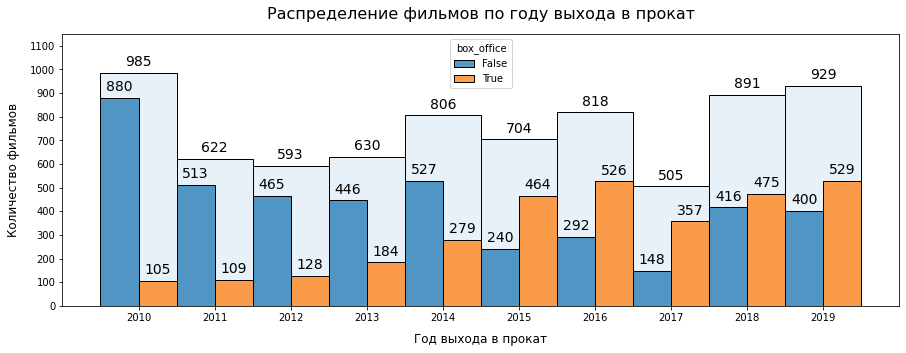

In [46]:
f, ax = plt.subplots(figsize=(15, 5))

plt.xlabel('Год выхода в прокат', labelpad = 10, size = 12)
plt.ylabel('Количество фильмов', labelpad = 10, size = 12)
plt.title('Распределение фильмов по году выхода в прокат', pad = 15, size = 16)

ax.set(xlim=(2009, 2020), xticks=np.arange(2010, 2020, 1),
       ylim=(0, 1150), yticks=np.arange(0, 1200, 100))

sns.histplot(data=df, x='year', discrete=True, multiple='stack', alpha=.1)

sns.histplot(data=df, x='year', hue=~df['box_office'].isna(), discrete=True, legend=True, multiple='dodge', alpha=.75)

for container in ax.containers:
    ax.bar_label(container, padding = 4, fontsize = 14)

plt.show()

В 2010 году вышло рекордное количество фильмов, затем было падение больше чем на треть и последующий рост год от года. Выделяется так же 2017 год, падением на треть.

Обратим внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Количество фильмов без информации о сборах падает от года к году, одновременно растёт количество фильмов с известными сборами.

Посчитаем, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

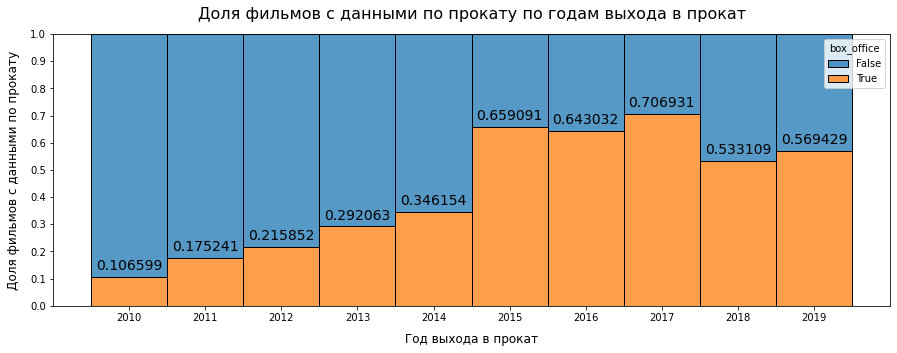

In [47]:
f, ax = plt.subplots(figsize=(15, 5))

plt.xlabel('Год выхода в прокат', labelpad = 10, size = 12)
plt.ylabel('Доля фильмов с данными по прокату', labelpad = 10, size = 12)
plt.title('Доля фильмов с данными по прокату по годам выхода в прокат', pad = 15, size = 16)

ax.set(xlim=(2009, 2020), xticks=np.arange(2010, 2020, 1),
       ylim=(0, 1), yticks=np.arange(0, 1.1, 0.1))

sns.histplot(data=df, x='year', hue=~df['box_office'].isna(), discrete=True, legend=True, multiple='fill', alpha=.75)

ax.bar_label(ax.containers[0], padding = 4, fontsize = 14)

plt.show()

Доля фильмов с данными по прокату постепенно растёт, от 11% в 2010 до 57% в 2019 с пиком в 71% в 2017.

Изучим, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

In [48]:
df.pivot_table(index='year', values='box_office', aggfunc=['sum', 'min', 'max'])

,sum,min,max
,box_office,box_office,box_office
year,,,
2010,2.428654,0.000000,1.446400
2011,14.102765,0.000125,11.618085
2012,6.955423,0.000000,2.311220
2013,29.799706,0.000000,19.957031
2014,7434.717843,0.000000,1016.410635
2015,39495.407458,0.000000,1658.861425
2016,47866.299742,0.000000,2048.126108
2017,48563.707218,0.007900,2779.686144


Сумма сборов растёт от года к году. Максимум был зафиксирован в 2018 году и составил 49,668 млрд рублей.
Максимум сборов для одной ленты - 3,073 млрд рублей.

Минимальная сумма сбора была в 2010 году - всего 2,428 млн рублей, но это объясняется скорее малым количеством данных.

С помощью сводной таблицы посчитаем среднюю и медианную сумму сборов для каждого года.

In [49]:
df.pivot_table(index='year', values='box_office', aggfunc=['mean', 'median'])

,mean,median
,box_office,box_office
year,,
2010,0.023130,0.001700
2011,0.129383,0.003000
2012,0.054339,0.005660
2013,0.161955,0.003523
2014,26.647734,0.018115
2015,85.119413,4.946745
2016,91.000570,3.846679
2017,136.032793,9.968340


Средняя сумма сборов по картинам была максимальной  2017 году - 136 млн рублей. Медиана же намного скромнее, максимум достигнут в том же 2017 году - 9,968 млн рублей.

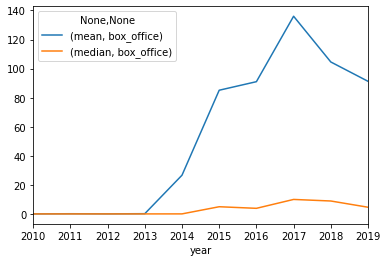

In [72]:
df.pivot_table(index='year', values='box_office', aggfunc=['mean', 'median']).plot();

Определим, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года?

In [50]:
data = df.query('2015 <= year <= 2019')

data.pivot_table(
    index=['age_restriction', 'year'],
    values='box_office',
    aggfunc=['sum', 'mean', 'median']
)

sum        mean  \
                                               box_office  box_office   
age_restriction                        year                             
«0+» - для любой зрительской аудитории 2015    379.054578    9.719348   
                                       2016    150.228849    3.664118   
                                       2017    229.598930   76.532977   
                                       2018     32.449002    6.489800   
                                       2019     17.746067    5.915356   
«6+» - для детей старше 6 лет          2015   8701.799371  164.184894   
                                       2016  12053.146008  172.187800   
                                       2017  12086.142146  268.580937   
                                       2018  10104.974623  148.602568   
                                       2019  12704.941824  158.811773   
«12+» - для детей старше 12 лет        2015  13616.082009  186.521671   
                                       2016  12204.446524  148.834714   
                                       2017   7851.427661  191.498236   
                                       2018  14267.291661  212.944652   
                                       2019  12680.198774  149.178809   
«16+» - для детей старше 16 лет        2015  11368.120870   67.667386   
                                       2016  16664.548542   91.563454   
                                       2017  18745.042900  154.917710   
                                       2018  16503.602347  105.792323   
                                       2019  12753.418985   71.648421   
«18+» - запрещено для детей            2015   5430.350629   41.453058   
                                       2016   6793.929819   44.992913   
                                       2017   9651.495581   65.656433   
                                       2018   8760.085501   48.939025   
                                       2019  10121.796304   55.310362   

                                                median  
                                            box_office  
age_restriction                        year             
«0+» - для любой зрительской аудитории 2015   2.943319  
                                       2016   2.571294  
                                       2017  22.178956  
                                       2018   3.616937  
                                       2019   3.885435  
«6+» - для детей старше 6 лет          2015  20.380982  
                                       2016   3.026256  
                                       2017  51.992103  
                                       2018  14.688850  
                                       2019  12.525532  
«12+» - для детей старше 12 лет        2015  15.351562  
                                       2016   4.690635  
                                       2017   9.010548  
                                       2018   8.931966  
                                       2019   3.405546  
«16+» - для детей старше 16 лет        2015   4.676819  
                                       2016   5.133022  
                                       2017   9.702077  
                                       2018   9.010639  
                                       2019   3.210718  
«18+» - запрещено для детей            2015   4.654761  
                                       2016   6.107002  
                                       2017   8.212677  
                                       2018   7.179466  
                                       2019   5.603217

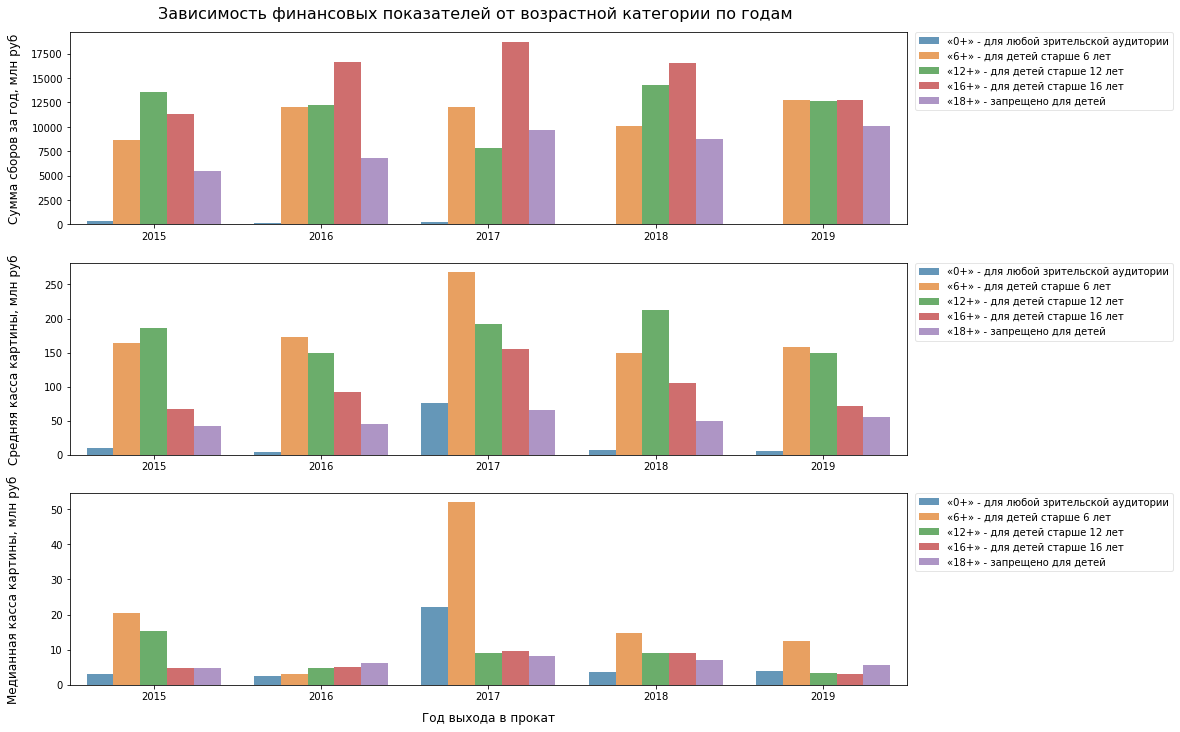

In [51]:
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 12))

sns.barplot(data=data,
    x='year', y='box_office', hue='age_restriction',
    ci=None, alpha=.75, estimator=sum, ax=ax1)

sns.barplot(data=data,
    x='year', y='box_office', hue='age_restriction',
    ci=None, alpha=.75, ax=ax2)

sns.barplot(data=data,
    x='year', y='box_office', hue='age_restriction',
    ci=None, alpha=.75, estimator=np.median, ax=ax3)

ax1.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0., framealpha=.5)
ax2.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0., framealpha=.5)
ax3.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0., framealpha=.5)
ax1.set_xlabel('')
ax2.set_xlabel('')
ax3.set_xlabel('Год выхода в прокат', labelpad=10, size=12)
ax1.set_ylabel('Сумма сборов за год, млн руб', labelpad=10, size=12)
ax2.set_ylabel('Средняя касса картины, млн руб', labelpad=23, size=12)
ax3.set_ylabel('Медианная касса картины, млн руб', labelpad=30, size=12)
f.suptitle('Зависимость финансовых показателей от возрастной категории по годам', size=16, y=0.91)

plt.show()

### Вывод

Проведя исследовательский анализ данных мы вяснили, что в 2010 году вышло рекордное количество фильмов, затем было падение больше чем на треть и последующий рост год от года. Выделяется так же 2017 год, падением на треть.

Доля фильмов с данными по прокату постепенно растёт, от 11% в 2010 до 57% в 2019 с пиком в 71% в 2017.

Сумма сборов растёт от года к году. Максимум был зафиксирован в 2018 году и составил 49,668 млрд рублей.
Максимум сборов для одной ленты - 3,073 млрд рублей.

Минимальная сумма сбора была в 2010 году - всего 2,428 млн рублей, но это объясняется скорее малым количеством данных.

Средняя сумма сборов по картинам была максимальной  2017 году - 136 млн рублей. Медиана же намного скромнее, максимум достигнут в том же 2017 году - 9,968 млн рублей.

Есть явная зависимость сборов от возрастного ограничения в периоде с 2015 по 2019 год.

По суммарным сборам:
   - идёт выравнивание между категориями;
   - постепенно уменьшилась доля подросткового кино (16+);
   - увеличилась доля фильмов для взрослых (18+) и семейного кино (6+), при этом доля кино 12+ уменьшилась.
   
По средним сборам на протяжении года в периоде с 2015 по 2019 год картина принципиально не меняется, лишь средняя касса в целом была выше в 2017 и 2018 годах.

По медианным данным за 2015-2019 годы мы видим:
   - выраженный скачок в 2017 году в категориях 0+ и 6+;
   - стабильнее всего по сборам семейное кино (6+).

## Часть 4. Исследование фильмов, получивших государственную поддержку <a id="step4"></a>

Для отдельного анализа фильмов с государственной поддержкой выделим строки в отдельный датасет.

In [52]:
df_supported = df[df['budget'] > 0].copy()

Обновим категориальные данные.

In [53]:
df_supported['type'].cat.remove_unused_categories(inplace=True)
df_supported['main_country'].cat.remove_unused_categories(inplace=True)
df_supported['main_director'].cat.remove_unused_categories(inplace=True)
df_supported['main_producer'].cat.remove_unused_categories(inplace=True)
df_supported['main_genre'].cat.remove_unused_categories(inplace=True)

In [54]:
df_supported.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 329 entries, 1281 to 7478
Data columns (total 23 columns):
title                    329 non-null object
pu_number                329 non-null int64
show_start_date          329 non-null datetime64[ns, UTC]
year                     329 non-null int16
type                     329 non-null category
film_studio              329 non-null object
production_country       329 non-null object
main_country             329 non-null category
director                 329 non-null object
main_director            329 non-null category
producer                 327 non-null object
main_producer            327 non-null category
age_restriction          329 non-null category
refundable_support       329 non-null float64
nonrefundable_support    329 non-null float64
total_support            329 non-null float64
budget                   329 non-null float64
share                    329 non-null float64
financing_source         329 non-null category
ratings 

## 4.1. Проверка влияния различных факторов на степень государственной поддержки  <a id="step41"></a>

Посмотрим какие факторы влияют на степень поддержки фильма государством.

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)
/home/jovyan/.local/lib/python3.7/site-packages/seaborn/relational.py:657: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep the old behavior, pass 'dtype="datetime64[ns]"'.
  args = np.asarray(x), np.asarray(y), np.asarray(s), np.asarray(c)


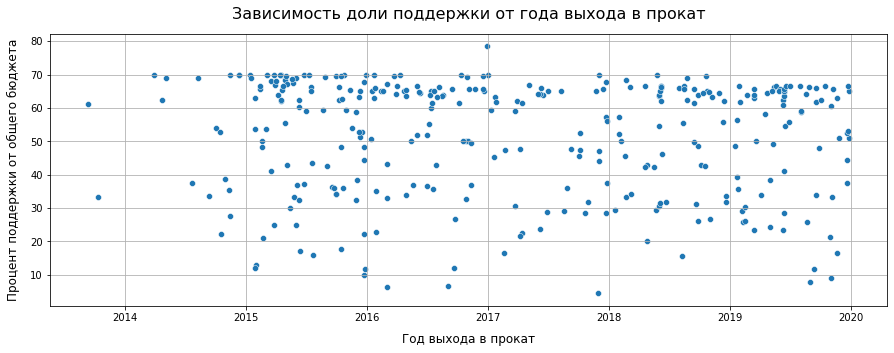

In [55]:
f, ax = plt.subplots(figsize=(15, 5))

sns.scatterplot(data=df_supported, x='show_start_date', y='share')

plt.xlabel('Год выхода в прокат', labelpad = 10, size = 12)
plt.ylabel('Процент поддержки от общего бюджета', labelpad = 10, size = 12)
plt.title('Зависимость доли поддержки от года выхода в прокат', pad = 15, size = 16)
plt.grid(visible=True)

plt.show()

По графику видно что наиболее часто выдавали максимальную поддержку, 60-70% от общего бюджета. Явной зависимости количества поддержки в зависимости от года не наблюдается.

Из массы выделяется одно значение, проверим его.

In [56]:
df.query('share > 70')

,title,pu_number,show_start_date,year,type,film_studio,production_country,main_country,director,main_director,...,refundable_support,nonrefundable_support,total_support,budget,share,financing_source,ratings,genres,main_genre,box_office
3385,О любви (2017),111018816,2016-12-28 12:00:00+00:00,2016,Художественный,"ООО ""СТУДИЯ ""2-Б-2"" ИНТЕРТЭЙНМЕНТ""",Россия,Россия,В.Бортко,В.Бортко,...,20.0,35.0,55.0,70.086439,78.47,"Министерство культуры, Фонд кино",NaN,NaN,NaN,11.332412


Возможно, в данном случае была допущена ошибка при введении данных о финансировании.

Проверим как менялась поддержка по годам в суммарном выражении.

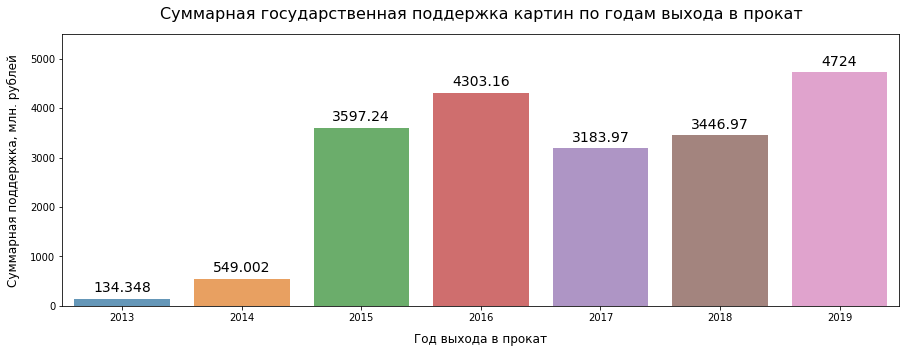

In [57]:
f, ax = plt.subplots(figsize=(15, 5))

sns.barplot(data=df_supported,
    x='year', y='total_support',
    ci=None, alpha=.75, estimator=sum)

ax.set(ylim=(0, 5500))

plt.xlabel('Год выхода в прокат', labelpad = 10, size = 12)
plt.ylabel('Суммарная поддержка, млн. рублей', labelpad = 10, size = 12)
plt.title('Суммарная государственная поддержка картин по годам выхода в прокат', pad = 15, size = 16)

ax.bar_label(ax.containers[0], padding = 4, fontsize = 14)

plt.show()

В 2015 году произошёл резкий рост финансирования, с 549 млн. рублей до 3.6 млрд. В целом наблюдается тренд на рост финансирования.

Посмотрим на финансирование в зависимости от режиссёра картины.

In [58]:
df_supported.pivot_table(
    index='main_director', values=['share', 'total_support'],
    aggfunc={'share':['count', 'mean', 'median'], 'total_support':'sum'}
).sort_values(by=('share', 'count'), ascending=False).head(10)

share                   total_support
              count       mean median           sum
main_director                                      
Р.Давлетьяров     5  57.362000  62.04    459.847945
Д.Дьяченко        4  50.937500  52.96    351.000000
С.Андреасян       4  39.590000  37.53    325.000000
А.Котт            3  55.026667  55.05    129.000000
А.Аксененко       3  39.786667  40.98     90.000000
К.Шипенко         3  45.270000  45.57    312.000000
С.Мокрицкий       3  43.146667  38.46    202.510000
А.Цицилин         3  42.396667  33.66    350.000000
Н.Хомерики        3  62.686667  66.12    660.000000
Д.Шмидт           3  32.230000  22.31    215.000000

Чаще других получали государственную поддержку картины Рената Давлетьярова (по случайному совпадению член экспертного совета "Фонда Кино").

Посмотрим чьи картины получили наибольшую суммарную поддержку.

In [59]:
df_supported.pivot_table(
    index='main_director', values=['share', 'total_support', 'nonrefundable_support'],
    aggfunc={'share':['count', 'mean', 'median'], 'total_support':'sum', 'nonrefundable_support':'sum'}
).sort_values(by=('total_support', 'sum'), ascending=False).head(10)

nonrefundable_support share                   total_support
                                sum count       mean median           sum
main_director                                                            
Ф.Бондарчук              650.000000     2  59.380000  59.38    750.000000
Н.Хомерики               540.000000     3  62.686667  66.12    660.000000
А.Кравчук                400.000000     1  51.020000  51.02    500.000000
Р.Давлетьяров            394.847945     5  57.362000  62.04    459.847945
А.Мизгирев               300.000000     1  65.770000  65.77    450.000000
Н.Лебедев                392.104482     1  69.590000  69.59    442.104482
А.Мегердичев             400.000000     1  67.770000  67.77    400.000000
Д.Дьяченко               180.000000     4  50.937500  52.96    351.000000
И.Шурховецкий            250.000000     1  70.000000  70.00    350.000000
Д.Киселев                225.000000     2  52.330000  52.33    350.000000

Наибольшее финансирование по сумме государственной поддержки получил Фёдор Бондарчук - 750 млн. рублей, из них 650 млн. невозвратных (по ещё б**о**льшему совпадению также член экспертного совета "Фонда Кино").

Посмотрим на зависимость финансирования от продюссера картины.

In [60]:
df_supported.pivot_table(
    index='main_producer', values=['share', 'total_support'],
    aggfunc={'share':['count', 'mean', 'median'], 'total_support':'sum'}
).sort_values(by=('share', 'count'), ascending=False).head(10)

share                    total_support
                   count       mean  median           sum
main_producer                                            
С.Сельянов            19  41.452105  42.580   1550.000000
Э.Илоян                9  41.181111  37.500    640.000000
Р.Дишдишян             8  49.571250  57.495    352.000000
Т.Бекмамбетов          8  60.727500  63.035    982.000000
Г.Малков               6  46.730000  46.850    235.000000
ООО "ВИЗАРТ ФИЛЬМ"     5  39.200000  33.660    540.000000
Р.Давлетьяров          5  57.562000  62.040    336.797945
Н.Мокрицкая            4  53.245000  61.000    228.510000
Э.Пичугин              4  58.970000  60.910    160.000866
А.Новиков              4  65.565000  65.630    103.345000

Наибольшую поддержку смогли получить картины продюссируемые Сергеем Сельяновым (член экспертного совета "Фонда Кино", ещё одно совершенно случайное совпадение).

Посмотрим на наибольшую суммарную поддержку.

In [61]:
df_supported.pivot_table(
    index='main_producer', values=['share', 'total_support', 'nonrefundable_support'],
    aggfunc={'share':['count', 'mean', 'median'], 'total_support':'sum', 'nonrefundable_support':'sum'}
).sort_values(by=('total_support', 'sum'), ascending=False).head(10)

nonrefundable_support share                     \
                                           sum count       mean  median   
main_producer                                                             
С.Сельянов                         1105.000000    19  41.452105  42.580   
Т.Бекмамбетов                       709.000000     8  60.727500  63.035   
Л.Верещагин                         792.104482     2  68.680000  68.680   
Ф.Бондарчук                         506.000000     4  53.787500  58.305   
Э.Илоян                             425.000000     9  41.181111  37.500   
ООО "Централ Партнершип"            505.000000     3  62.800000  68.400   
ООО "ВИЗАРТ ФИЛЬМ"                  300.000000     5  39.200000  33.660   
А.Роднянский                        390.000000     2  49.720000  49.720   
А.Максимов                          400.000000     1  51.020000  51.020   
ООО "Арт Пикчерс Студия"            458.969465     3  66.176667  65.790   

                         total_support  
                                   sum  
main_producer                           
С.Сельянов                 1550.000000  
Т.Бекмамбетов               982.000000  
Л.Верещагин                 842.104482  
Ф.Бондарчук                 650.000000  
Э.Илоян                     640.000000  
ООО "Централ Партнершип"    610.000000  
ООО "ВИЗАРТ ФИЛЬМ"          540.000000  
А.Роднянский                540.000000  
А.Максимов                  500.000000  
ООО "Арт Пикчерс Студия"    468.969465

Картина принципиально не поменялась.

Посмотрим, есть ли зависимость доли государственного участия от возрастной категории кино.

In [62]:
df_supported.pivot_table(
    index='age_restriction', values=['share', 'total_support', 'nonrefundable_support'],
    aggfunc={'share':['count', 'mean', 'median'], 'total_support':'sum', 'nonrefundable_support':'sum'}
).sort_values(by=('total_support', 'sum'), ascending=False).head(10)

nonrefundable_support share             \
                                                         sum count       mean   
age_restriction                                                                 
«12+» - для детей старше 12 лет                  6231.894165   106  51.417358   
«16+» - для детей старше 16 лет                  4710.900200   124  54.267258   
«6+» - для детей старше 6 лет                    3967.373947    64  48.454844   
«18+» - запрещено для детей                       921.000000    27  51.237778   
«0+» - для любой зрительской аудитории            228.520000     8  39.681250   

                                               total_support  
                                        median           sum  
age_restriction                                               
«12+» - для детей старше 12 лет         59.425   7799.394165  
«16+» - для детей старше 16 лет         62.675   5546.053319  
«6+» - для детей старше 6 лет           53.205   5366.373947  
«18+» - запрещено для детей             55.050    953.346881  
«0+» - для любой зрительской аудитории  38.900    273.520000

Б**о**льшую поддержку получает кино возрастных категорий 6+, 12+ и 16+.

Проверим, есть ли зависимости с учётом жанра кино.

In [63]:
df_supported.pivot_table(
    index='main_genre', values=['share', 'total_support', 'nonrefundable_support'],
    aggfunc={'share':['count', 'mean', 'median'], 'total_support':'sum', 'nonrefundable_support':'sum'}
).sort_values(by=('total_support', 'sum'), ascending=False).head(10)

nonrefundable_support share                    total_support
                              sum count       mean  median           sum
main_genre                                                              
драма                 4686.059751    93  54.387634  62.000   5314.406632
комедия               2362.782945    73  52.195068  56.450   3159.282945
мультфильм            1411.520000    30  40.660000  34.710   2281.520000
фантастика            1216.000000    11  46.367273  52.970   1406.000000
фэнтези                799.900000    11  55.340000  62.500   1032.900000
история                820.000000     4  42.810000  38.515   1020.000000
триллер                639.645285    15  55.629333  59.230    769.645285
приключения            441.000000     7  37.101429  42.860    696.000000
детектив               430.000000     5  49.226000  55.930    485.000000
спорт                  455.000000     3  54.026667  50.000    455.000000

Чаще других поддержку получают киноленты жанра `драма` и `комедия`, замыкают десятку жанры `спорт` и `детектив`.

### Вывод

Прямой зависимости доли государственного участия в картине от года выхода в прокат не наблюдается. Государство достаточно стабильно учавствует в жизни кинематографа. Суммарное финансирование растёт год от года.

Чаще других поддержку получают режиссёры Р. Давлетьяров, Д. Дьяченко и С. Андреасян.

Наибольшая в финансовом плане поддержка была предоставлена продюссерам С. Сельянову, Т. Бекмамбетову и Л. Верещагину.

Б**о**льшую поддержку получает кино возрастных категорий 6+, 12+ и 16+.

Среди поддерживаемых жанров преобладают `драма` и `комедия`. Вероятно, ставка на наиболее сильный эмоциональный отклик аудитории. Жанр `военное кино`, вопреки ожиданиям, не так часто получает поддержку.

## 4.2. Сравнение различных показателей в зависимости от наличия поддержки <a id="step42"></a>

Сравним фильмы с поддержкой и без. Найдём различия и сходства.

Посмотрим на рейтинги вышедших картин.

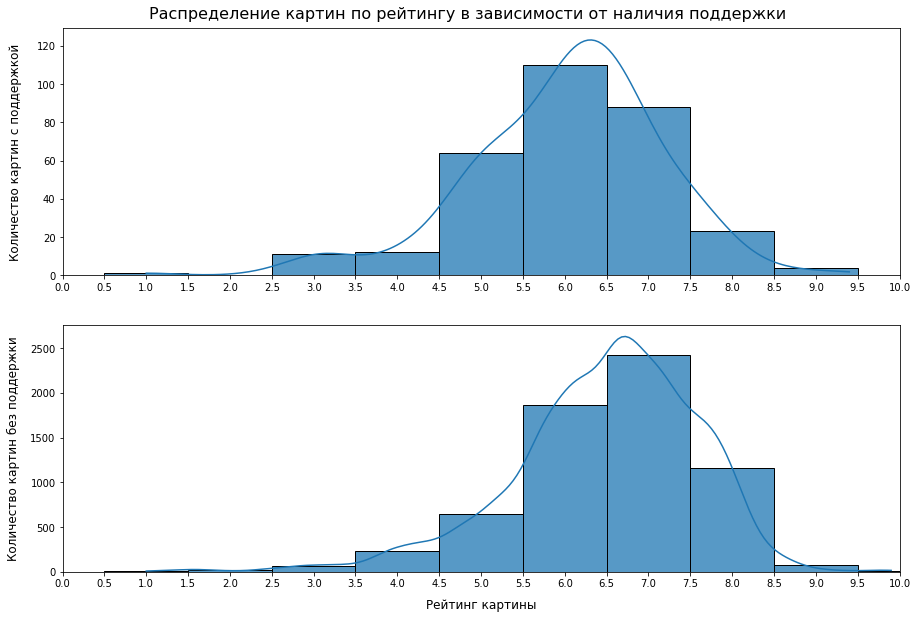

In [64]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

sns.histplot(data=df_supported, x='ratings', discrete=True, kde=True, alpha=.75, ax=ax1)

sns.histplot(data=df, x='ratings', discrete=True, kde=True, alpha=.75, ax=ax2)

ax1.set_xlabel('')
ax2.set_xlabel('Рейтинг картины', labelpad=10, size=12)
ax1.set_ylabel('Количество картин с поддержкой', labelpad=15, size=12)
ax2.set_ylabel('Количество картин без поддержки', labelpad=10, size=12)
f.suptitle('Распределение картин по рейтингу в зависимости от наличия поддержки', size=16, y=0.91)

ax1.set(xlim=(0, 10), xticks=np.arange(0, 10.5, 0.5))
ax2.set(xlim=(0, 10), xticks=np.arange(0, 10.5, 0.5))

plt.show()

Характер распределения оценок схожий. Откровенно провальных картин, как и сильно удачных очень мало, превалирует диапазон от 5 до 8 баллов.

Из отличий можно заметить смещение максимума частоты оценок. Максимум для картин с поддержкой - 6.4, максимум по российскому кинопрокату в целом - 6.7

Посмотрим на распределение по жанрам для картин с поддержкой.

In [65]:
top_genres_supported = list(df_supported['main_genre'].value_counts()[:10].index)

entries_number = df_supported.query('main_genre in @top_genres_supported').shape[0]

def percentage(column):
    '''
    Функция подсчитывает процент картин в определённом жанре.
    '''
    quantity = 0
    for i in column:
        quantity += 1
    return '{:.2%}'.format(quantity/entries_number)

df_supported.query('main_genre in @top_genres_supported').pivot_table(
    index='main_genre', values='ratings',
    aggfunc={'ratings':['count', 'median', percentage]}
).sort_values(by='count', ascending=False).head(10)

,count,median,percentage
main_genre,,,
драма,93,6.40,34.07%
комедия,73,5.70,26.74%
мультфильм,30,6.15,10.99%
триллер,15,5.60,5.49%
мелодрама,14,6.05,5.13%
фантастика,11,6.20,4.03%
фэнтези,11,6.80,4.03%
ужасы,10,5.10,3.66%
военный,9,6.40,3.30%


И для российского кинопроката в целом.

In [66]:
top_genres = list(df['main_genre'].value_counts()[:10].index)

entries_number = df.query('main_genre in @top_genres').shape[0]

df.query('main_genre in @top_genres').pivot_table(
    index='main_genre', values='ratings',
    aggfunc={'ratings':['count', 'median', percentage]}
).sort_values(by='count', ascending=False).head(10)

,count,median,percentage
main_genre,,,
драма,1688,6.8,28.13%
комедия,696,6.1,11.60%
боевик,617,6.7,10.28%
ужасы,573,5.7,9.55%
мультфильм,537,6.5,8.95%
триллер,521,6.6,8.68%
фантастика,410,6.7,6.83%
мелодрама,382,6.7,6.37%
фэнтези,358,6.6,5.97%


### Вывод

Характер распределения оценок для фильмов с поддержкой и без схожий. Откровенно провальных картин, как и сильно удачных очень мало, превалирует диапазон от 5 до 8 баллов.

Из отличий можно заметить смещение максимума частоты оценок. Максимум для картин с поддержкой - 6.4, максимум по российскому кинопрокату в целом - 6.7

Первые два места в сравниваемых распределениях занимают жанры `драма` и `комедия`, при этом в поддерживаемом сегменте на эти жанры приходится суммарно больше 60% от всех картин. Для российского проката в целом цифра меньше - около 40%.

На третьем месте в спонсируемом Министерством Культуры сегменте идут `мультфильмы` с 11%, для кинопроката в целом это `боевики`.

В остальном сегменты весьма схожи.

## 4.3. Анализ финансовых показателей картин с государственной поддержкой <a id="step43"></a>

Посмотрим сколько всего средств выделено по годам и сколько из них были отбиты кассовыми сборами.

Добавим столбец с данными о проценте возврата денег.

In [67]:
def return_rate(row):
    '''
    Функция подсчитывает процент возврата денег.
    '''
    return row['box_office']/row['budget']*100

Составим сводную таблицу с финансовыми показателями.

In [68]:
df_supported.pivot_table(
    index='year',
    values=['refundable_support', 'nonrefundable_support', 'total_support', 'box_office', 'return_rate', 'budget'],
    aggfunc={'refundable_support':'sum', 'nonrefundable_support':'sum', 
             'total_support':'sum', 'box_office':'sum', 'return_rate':['median', 'mean', 'min', 'max'], 'budget':'sum'}
)

box_office        budget nonrefundable_support refundable_support  \
               sum           sum                   sum                sum   
year                                                                        
2013     20.322385    255.435390            134.347945           0.000000   
2014   1007.188151   1279.484783            478.002299          71.000000   
2015   5783.327680   8726.869207           2960.088340         637.153119   
2016   6081.707839   7813.842748           3381.655482         921.500000   
2017  10865.075301   7180.412568           2464.624781         719.346881   
2018   9934.069010   7212.694634           2784.969465         662.000000   
2019   8262.020628  12542.866609           3856.000000         868.000000   

      return_rate                                  total_support  
              max        mean     median       min           sum  
year                                                              
2013    11.337709    5.898892   5.898892  0.460074    134.347945  
2014   508.185695   62.541350   5.488036  0.075762    549.002299  
2015   522.915735   53.223388  10.398605  0.001703   3597.241459  
2016   664.356610   62.755204  15.171407  0.009909   4303.155482  
2017   490.561775   99.860314  39.864015  0.435311   3183.971662  
2018   972.998377  111.372045  34.894766  0.123621   3446.969465  
2019  1920.980432   87.804358  22.849841  0.164342   4724.000000

Рассмотрим подробнее на графике окупаемость кинолент с государственной поддержкой.

/home/jovyan/.local/lib/python3.7/site-packages/seaborn/relational.py:657: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep the old behavior, pass 'dtype="datetime64[ns]"'.
  args = np.asarray(x), np.asarray(y), np.asarray(s), np.asarray(c)


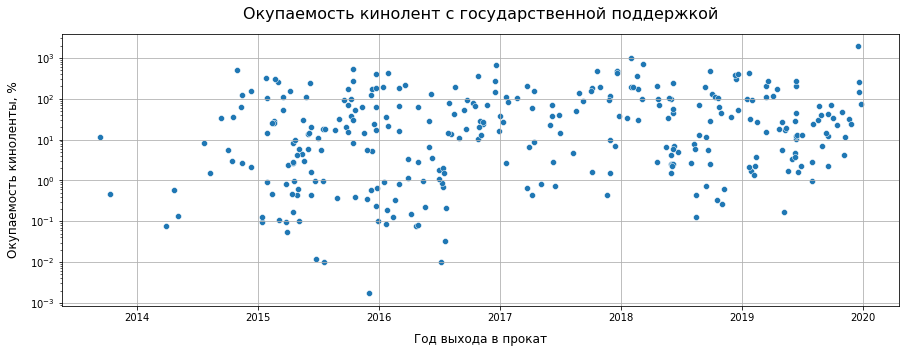

In [69]:
f, ax = plt.subplots(figsize=(15, 5))

sns.scatterplot(data=df_supported, x='show_start_date', y='return_rate')

plt.xlabel('Год выхода в прокат', labelpad = 10, size = 12)
plt.ylabel('Окупаемость киноленты, %', labelpad = 10, size = 12)
plt.title('Окупаемость кинолент с государственной поддержкой', pad = 15, size = 16)
plt.grid(visible=True)
plt.yscale('log')

plt.show()

### Вывод

Как видно из приведённых данных, большая часть кинолент не отбивает свой бюджет, однако, некоторые удачные киноленты приносят сотни процентов прибыли своим создателям и, как следствие, общий баланс остаётся положительным.

Если от года к году сравнить сборы кинолент с их бюджетами, за вычетом государственной поддержки, то мы увидим что окупаемость таких кинолент будет колебаться около 100%.

Таким образом можно сделать вывод что фактически государственная поддержка стимулирует снимать киноленты на величину невозвратной поддержки по сравнению с нулевой доходностью без поддержки.

Оценка художественной ценности снимаемых картин и их вклада в мировой кинематограф, а также целесообразность самой программы для увеличения количества именно русского кино остаётся за рамками данного исследования.

## Часть 5. Общий вывод <a id="step5"></a>

В данной работе мы изучили рынок российского кинопроката и выявили текущие тренды. Уделили внимание фильмам, которые получили государственную поддержку. 

В ходе работы мы изучили полученные с сайта Министерства Культуры базы данных. Провели подготовку и объединение необходимой для исследования информации.

Для проведения работы мы предобработали данные, изменили типы, где было необходимо, проверили пропуски, дубликаты, различные типы значений. Добавили производные данные.

Провели исследовательский анализ данных и исследовали сколько фильмов выходило каждый год. Посмотрели на динамику проката. Определили влияние возрастных ограничений киноленты на сборы фильма в прокате.

Отдельно мы провели анализ кинолент получивших государственную поддержку от Министерства Культуры РФ и Фонда Кино. Изучили какие киноленты получали наибольшую поддержку, что на это влияло. Изучили количественные характеристики поддержки. Сравнили по различным параметрам фильмы с поддержкой с общим российским кинопрокатом.

Окончательно выяснить насколько такие фильмы интересны зрителю можно было бы с данными по количеству проданных билетов, однако, даже без этих данных видно что в целом российское кино не является убыточным. Даже без государственной поддержки окупаемость находилась бы на уровне 100%. Фактически программа государственной поддержки рассчитана не на закрытие дефицита бюджета, а на выведение окупаемости в положительную зону, что является драйвером развития для кинобизнеса.